In [ ]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

In [ ]:
from  diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch


In [ ]:
!pip show torch

Name: torch
Version: 2.10.0+cu128
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org
Author: 
Author-email: PyTorch Team <packages@pytorch.org>
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: cuda-bindings, filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvshmem-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [ ]:
model1_id1 ="dreamlike-art/dreamlike-photoreal-2.0"
model2_id2 ="stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model1_id1, torch_dtype = torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--dreamlike-art--dreamlike-photoreal-2.0/snapshots/d9e27ac81cfa72def39d74ca673219c349f0a0d5/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
torch

<module 'torch' from '/usr/local/lib/python3.12/dist-packages/torch/__init__.py'>

In [ ]:
prompt = """A floating island city in pastel twilight skies, crystalline waterfalls cascading into void, bioluminescent vines twisting around ancient ruins, dreamlike atmosphere, highly detailed, art by Beksiński and Dali"""

In [ ]:
image  = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[prompt]: A floating island city in pastel twilight skies, crystalline waterfalls cascading into void, bioluminescent vines twisting around ancient ruins, dreamlike atmosphere, highly detailed, art by Beksiński and Dali


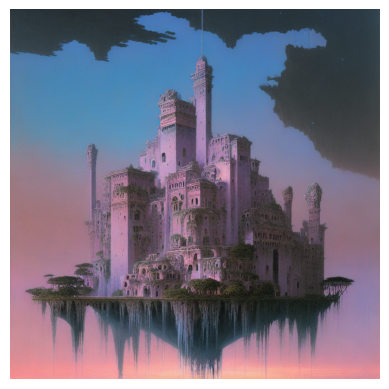

In [ ]:
print("[prompt]:", prompt)
plt.imshow(image);
plt.axis('off');

  0%|          | 0/50 [00:00<?, ?it/s]

[Prompt]: Gigantic steampunk dragon made of orbiting planets and clockwork gears, exhaling nebulae fire, starry infinite background, intricate metallic scales with galaxy reflections, masterpiece, dreamlike diffusion style


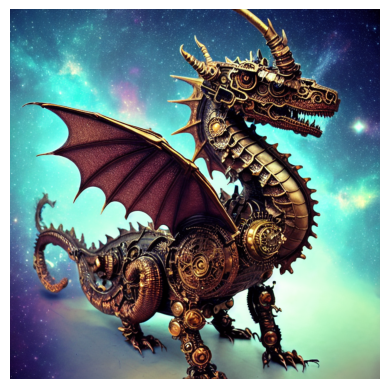

In [ ]:
prompt2 = "Gigantic steampunk dragon made of orbiting planets and clockwork gears, exhaling nebulae fire, starry infinite background, intricate metallic scales with galaxy reflections, masterpiece, dreamlike diffusion style"
image2 = pipe(prompt2).images[0]
print("[Prompt]:", prompt2)
plt.imshow(image2);
plt.axis('off');



### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt







In [ ]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplot(nrows=1, ncols= 'num_images')
    for i in range(img[i]):
      ax[i].imshow(img[i]);
      ax[i].axis('off');
  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [ ]:
prompt = "Enchanted forest portal opening to underwater crystal palace, glowing mushrooms and jellyfish trees, ethereal fog with floating lanterns, vibrant iridescent colors, fantasy art nouveau style, ultra-detailed"
params ={}

  0%|          | 0/50 [00:00<?, ?it/s]

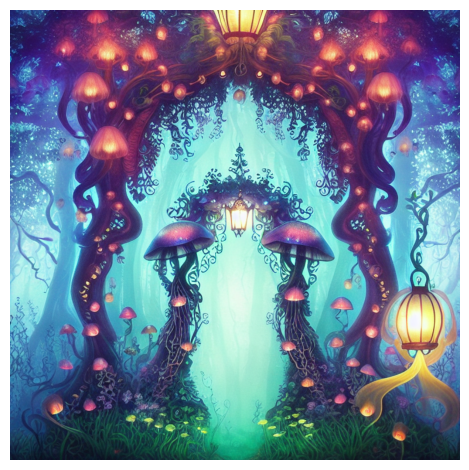

In [ ]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

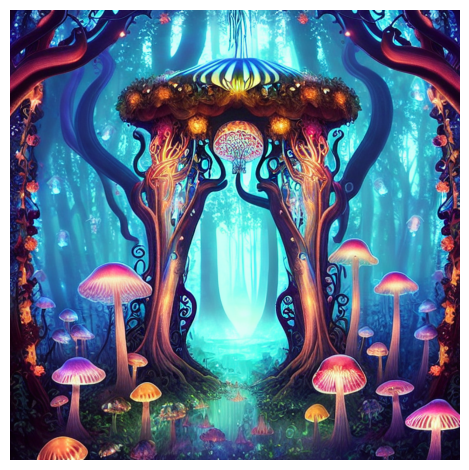

In [ ]:
#num inference steps
params = {'num_inference_steps': 100}
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

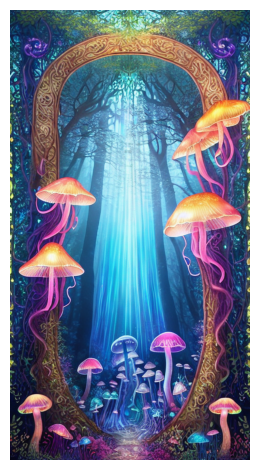

In [ ]:
#height width
params = {'num_inference_steps': 100, 'width':512, 'height': int(1.5*640)}
generate_image(pipe, prompt, params)